# Load packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get data
Get individual data for G1E and ER4 cell types and then merge for plotting.

In [2]:
G1E = pd.read_csv('feature-count/G1E-overlap.bed', sep='\t', header=None)
G1E = G1E.rename(columns={3: 'Type', 6: 'Count'})
G1E = G1E.loc[:, ['Type', 'Count']].groupby(by='Type', as_index=False).sum()
G1E['Cell'] = 'G1E'
G1E

,Type,Count,Cell
0,exon,58,G1E
1,intron,225,G1E
2,promoter,41,G1E


In [3]:
ER4 = pd.read_csv('feature-count/ER4-overlap.bed', sep='\t', header=None)
ER4 = ER4.rename(columns={3: 'Type', 6: 'Count'})
ER4 = ER4.loc[:, ['Type', 'Count']].groupby(by='Type', as_index=False).sum()
ER4['Cell'] = 'ER4'
ER4

,Type,Count,Cell
0,exon,79,ER4
1,intron,279,ER4
2,promoter,57,ER4


In [4]:
df = G1E.copy()
df = df.append(ER4)
df

,Type,Count,Cell
0,exon,58,G1E
1,intron,225,G1E
2,promoter,41,G1E
0,exon,79,ER4
1,intron,279,ER4
2,promoter,57,ER4


Below cell gets count of lost and gained binding sites for plotting in the second graph.

In [5]:
lost = pd.read_csv('diff/lost_binding.narrowPeak', sep='\t', header=None)
gained = pd.read_csv('diff/gained_binding.narrowPeak', sep='\t', header=None)

nlost = len(lost)
ngained = len(gained)

# Plotting

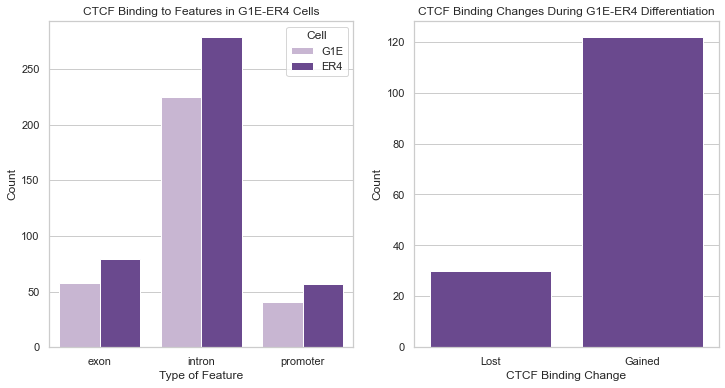

In [6]:
sns.set_theme(style='whitegrid')
colors = sns.color_palette('Paired')
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(12,6))

sns.barplot(x='Type', y='Count', hue='Cell', data=df, ax=ax1, palette=[colors[8], colors[9]])
ax1.set_xlabel('Type of Feature')
ax1.set_title('CTCF Binding to Features in G1E-ER4 Cells')

sns.barplot(x=['Lost', 'Gained'], y=[nlost, ngained], ax=ax2, color=colors[9])
ax2.set_xlabel('CTCF Binding Change')
ax2.set_ylabel('Count')
ax2.set_title('CTCF Binding Changes During G1E-ER4 Differentiation')

plt.savefig('CTCF_peak_plots.jpg')
plt.show()